In [1]:
import pandas as pd
import geopandas

In [ ]:
!pip install matplotlib

In [7]:
!pip install descartes

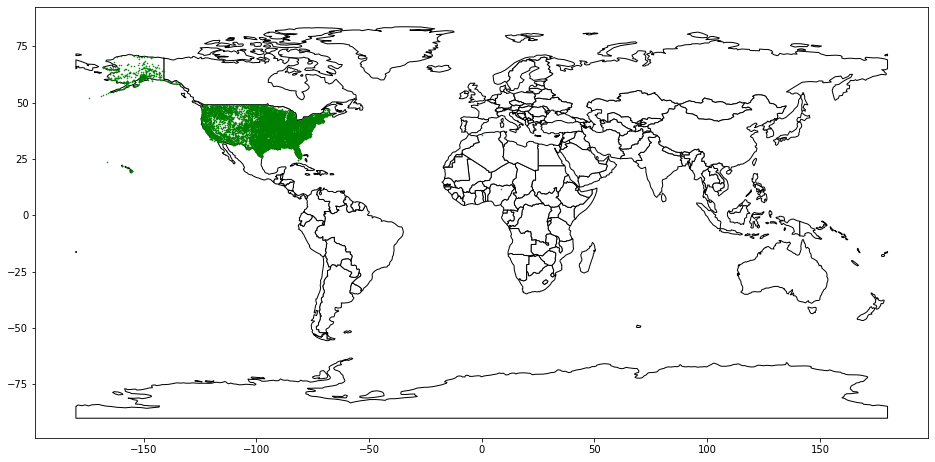

In [18]:
import matplotlib
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\supratimdas\PycharmProjects\DataEngineeringCapstoneProject\airflow\dags\temp_output\airport-codes_csv.csv")

data_new = data[(data['iso_country'] == 'US') & (data['type'] == 'small_airport' )]

query = """
SELECT a.longitude_deg, a.latitude_deg 
FROM project.airport_codes a 
WHERE a.iso_country = 'US' AND a.type = 'small_airport'
"""

gdf = geopandas.GeoDataFrame(
    data_new[['longitude_deg','latitude_deg']], 
    geometry=geopandas.points_from_xy(data_new.longitude_deg, 
                                      data_new.latitude_deg))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(16,12))
gdf.plot(ax=ax, color='green', markersize=0.3)

plt.show();